<a href="https://colab.research.google.com/github/aki05162525/gci_compe2/blob/main/compe2_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Google Colaboratoryで作業する場合はこちらも実行してください。
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# %cd 以降にこのnotebookを置いているディレクトリを指定してください。
%cd "/content/drive/MyDrive/GCI　Winter/compe2"

/content/drive/MyDrive/GCI　Winter/compe2


In [5]:
# データの読み込み
# INPUT_DIRにtrain.csvなどのデータを置いているディレクトリを指定してください。
INPUT_DIR = "./input/"

train = pd.read_csv(INPUT_DIR + "train.csv")
test = pd.read_csv(INPUT_DIR + "test.csv")
sample_sub = pd.read_csv(INPUT_DIR + "sample_submission.csv")

In [6]:
# trainデータの確認
print(f"train shape: {train.shape}")
train.head(10)

train shape: (171202, 51)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,Cash loans,F,N,N,0,112500.0,755190.0,36328.5,...,NaN,0.0,0.0,0.0,0.0,-292.0,NaN,NaN,NaN,NaN
1,1,0,Cash loans,F,N,Y,0,225000.0,585000.0,16893.0,...,0.553165,0.0,0.0,0.0,0.0,-617.0,0.0,0.0,0.0,1.0
2,2,0,Cash loans,F,N,Y,0,54000.0,334152.0,18256.5,...,NaN,4.0,0.0,4.0,0.0,-542.0,NaN,NaN,NaN,NaN
3,3,0,Cash loans,F,N,Y,0,67500.0,152820.0,8901.0,...,0.767523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,Cash loans,M,N,N,0,157500.0,271066.5,21546.0,...,0.669057,0.0,0.0,0.0,0.0,-1243.0,0.0,0.0,0.0,4.0
5,5,1,Cash loans,F,N,Y,0,135000.0,247500.0,19971.0,...,NaN,0.0,0.0,0.0,0.0,-307.0,NaN,NaN,NaN,NaN
6,6,0,Cash loans,F,N,Y,0,189000.0,332946.0,17127.0,...,0.399676,6.0,0.0,6.0,0.0,-1918.0,0.0,0.0,0.0,3.0
7,7,1,Cash loans,M,N,Y,0,157500.0,203760.0,24309.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
8,8,0,Cash loans,M,Y,N,1,324000.0,808650.0,22234.5,...,0.629674,1.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0
9,9,1,Cash loans,F,N,Y,1,180000.0,207117.0,16492.5,...,NaN,1.0,0.0,1.0,0.0,-905.0,NaN,NaN,NaN,NaN


In [16]:
# 欠損値の数と割合を計算
missing_values = train.isnull().sum()
missing_percentage = (missing_values / len(train)) * 100

# データフレーム化してソート
missing_summary_train = pd.DataFrame({
    '欠損値数': missing_values,
    '割合': missing_percentage
}).sort_values(by='割合', ascending=False)

# 欠損値がある列だけを出力
missing_summary_train = missing_summary_train[missing_summary_train['欠損値数'] > 0]

print(missing_summary_train)


                              欠損値数         割合
EXT_SOURCE_1                118928  69.466478
OWN_CAR_AGE                 112992  65.999229
EXT_SOURCE_3                 54586  31.883973
OCCUPATION_TYPE              53745  31.392741
FLAG_OWN_CAR                 34241  20.000350
FLAG_OWN_REALTY              34241  20.000350
AMT_REQ_CREDIT_BUREAU_YEAR   23116  13.502179
AMT_REQ_CREDIT_BUREAU_QRT    23116  13.502179
AMT_REQ_CREDIT_BUREAU_MON    23116  13.502179
AMT_REQ_CREDIT_BUREAU_HOUR   23116  13.502179
NAME_TYPE_SUITE                747   0.436327
DEF_30_CNT_SOCIAL_CIRCLE       560   0.327099
OBS_30_CNT_SOCIAL_CIRCLE       560   0.327099
DEF_60_CNT_SOCIAL_CIRCLE       560   0.327099
OBS_60_CNT_SOCIAL_CIRCLE       560   0.327099
EXT_SOURCE_2                   369   0.215535
AMT_GOODS_PRICE                163   0.095209
EXT_SOURCE_MEAN                117   0.068340
AMT_ANNUITY                      6   0.003505
CNT_FAM_MEMBERS                  2   0.001168
DAYS_LAST_PHONE_CHANGE           1

In [8]:
# 欠損値の数と割合を計算
missing_values_test = test.isnull().sum()
missing_percentage_test = (missing_values_test / len(test)) * 100

# データフレーム化してソート
missing_summary_test = pd.DataFrame({
    '欠損値数': missing_values_test,
    '割合': missing_percentage_test
}).sort_values(by='割合', ascending=False)

# 欠損値がある列だけを出力
missing_summary_test = missing_summary_test[missing_summary_test['欠損値数'] > 0]

print(missing_summary_test)


                             欠損値数         割合
EXT_SOURCE_1                42912  69.775610
OWN_CAR_AGE                 40909  66.518699
EXT_SOURCE_3                19690  32.016260
OCCUPATION_TYPE             18734  30.461789
FLAG_OWN_CAR                12334  20.055285
FLAG_OWN_REALTY             12334  20.055285
AMT_REQ_CREDIT_BUREAU_YEAR   8513  13.842276
AMT_REQ_CREDIT_BUREAU_MON    8513  13.842276
AMT_REQ_CREDIT_BUREAU_QRT    8513  13.842276
AMT_REQ_CREDIT_BUREAU_HOUR   8513  13.842276
NAME_TYPE_SUITE               248   0.403252
DEF_30_CNT_SOCIAL_CIRCLE      181   0.294309
OBS_30_CNT_SOCIAL_CIRCLE      181   0.294309
OBS_60_CNT_SOCIAL_CIRCLE      181   0.294309
DEF_60_CNT_SOCIAL_CIRCLE      181   0.294309
EXT_SOURCE_2                  130   0.211382
AMT_GOODS_PRICE                53   0.086179
AMT_ANNUITY                     3   0.004878


###EXT_SOURCE_MEANの処理

EXT_SOURCE
外部の正規化スコアだから外部の評価だから結構大事そう

新しい特徴量 EXT_SOURCE_MEAN を作成する。この特徴量は、EXT_SOURCE_1、EXT_SOURCE_2、EXT_SOURCE_3 の非欠損値の平均としよう！


In [9]:
#新しい特徴量 "EXT_SOURCE_MEAN" は非欠損値の平均
#axis=1は行方向、skipna=Trueは欠損値を無視
train['EXT_SOURCE_MEAN'] = train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1, skipna=True)

train['EXT_SOURCE_MEAN'].isnull().sum()

117

In [13]:
#新しい特徴量 "EXT_SOURCE_MEAN" は非欠損値の平均
#axis=1は行方向、skipna=Trueは欠損値を無視
test['EXT_SOURCE_MEAN'] = test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1, skipna=True)

test['EXT_SOURCE_MEAN'].isnull().sum()

43

欠損値はあるけど、後で考えてみようと思う

### OCCUPATION_TYPEの処理

In [11]:
train['OCCUPATION_TYPE']

,OCCUPATION_TYPE
0,Core staff
1,NaN
2,Core staff
3,NaN
4,Drivers
...,...
171197,Laborers
171198,Cooking staff
171199,Core staff
171200,Sales staff


In [14]:
test['OCCUPATION_TYPE']

,OCCUPATION_TYPE
0,Medicine staff
1,Cleaning staff
2,NaN
3,NaN
4,NaN
...,...
61495,Managers
61496,Sales staff
61497,Accountants
61498,NaN


OCCUPATION_TYPE_MISSING を作成


この特徴量は、OCCUPATION_TYPE 列が欠損している場合は 1、そうでない場合は 0

In [12]:
#職業の種類について欠損値がある場合は1、そうでない場合は0
#答えていない人はおそらく無職と予想します
#isnull()は、True（欠損）または False（欠損でない）のブール型（bool）の値が返される
#astype isnull() が返す True または False を整数型（int）に変換
train['OCCUPATION_TYPE_MISSING'] = train['OCCUPATION_TYPE'].isnull().astype(int)

train['OCCUPATION_TYPE_MISSING'].isnull().sum()


0

In [15]:
#職業の種類について欠損値がある場合は1、そうでない場合は0
#答えていない人はおそらく無職と予想します
#isnull()は、True（欠損）または False（欠損でない）のブール型（bool）の値が返される
#astype isnull() が返す True または False を整数型（int）に変換
test['OCCUPATION_TYPE_MISSING'] = test['OCCUPATION_TYPE'].isnull().astype(int)

test['OCCUPATION_TYPE_MISSING'].isnull().sum()


0

### #AMT_INCOME_TOTALの処理

クライアントの収入

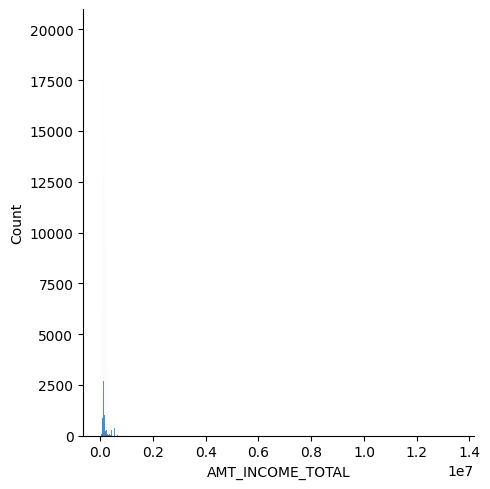

In [17]:
# AMT_INCOME_TOTALの分布
sns.displot(data=train, x="AMT_INCOME_TOTAL")
plt.show()

AMT_INCOME_TOTALは、通常通り可視化してもうまくグラフが表示されていません。このような場合には、大きな数値を取る少数の外れ値が存在することが原因であると考えられます。今回のようなデータを可視化したい場合は、対数変換を行うと上手くグラフを表示することができます。

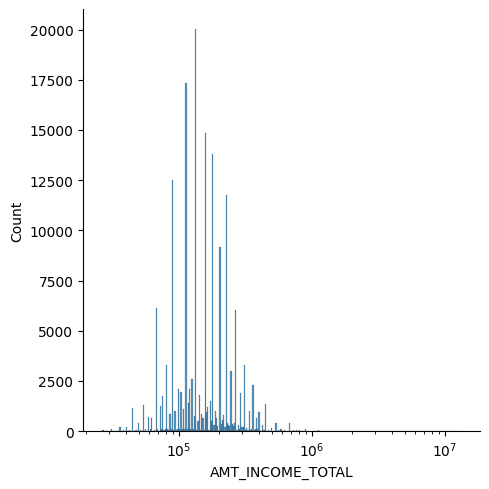

In [18]:
# AMT_INCOME_TOTALの分布（対数変換）
sns.displot(data=train, x="AMT_INCOME_TOTAL", log_scale=10)
plt.show()

対数変換してグラフを描画することで、うまく表示することができました。しかし、年収というのは本来連続的な値を取るはずなのに、グラフをみると離散的な値をとっているようです。AMT_INCOME_TOTALの値の種類を確認してみましょう。

In [20]:
# AMT_INCOME_TOTALの値の種類を確認
len(train["AMT_INCOME_TOTAL"].unique())

1641

trainには171202個のデータが存在するのですが、AMT_INCOME_TOTALは1641種類の値のみで構成されています。具体的に上位10個の値を確認してみましょう。

In [21]:
# AMT_INCOME_TOTALの上位10個
train["AMT_INCOME_TOTAL"].value_counts().head(10)

,count
AMT_INCOME_TOTAL,
135000.0,19969
112500.0,17320
157500.0,14772
180000.0,13791
90000.0,12481
225000.0,11573
202500.0,9128
67500.0,6130
270000.0,6006


どうやらAMT_INCOME_TOTALは正確な年収ではなく、きりの良い数字で集計されたデータであることが分かりました。

### NAME_CONTRACT_TYPEの前処理




In [25]:
print(train['NAME_INCOME_TYPE'].isnull().sum())
print(test['NAME_INCOME_TYPE'].isnull().sum())


0
0


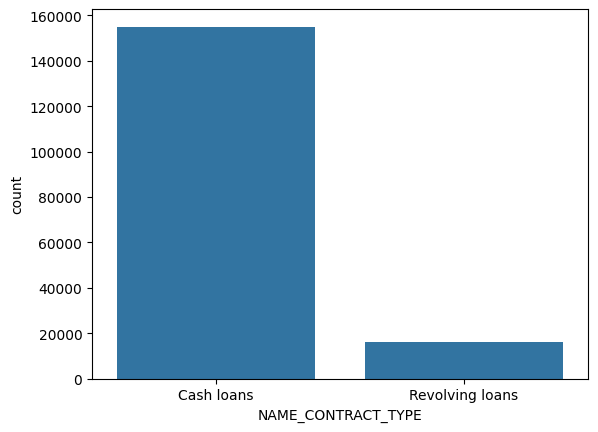

In [23]:
# NAME_CONTRACT_TYPEの分布
sns.countplot(data=train, x="NAME_CONTRACT_TYPE")
plt.show()

NAME_CONTRACT_TYPEには、Cash loansとRevolving loansという2種類の変数が存在しますが、大きく偏りがあることが分かります。また、機械学習モデルでは数値型のデータしか扱えないため、文字列型から数値型に変換する必要があります。

NAME_CONTRACT_TYPEを数値型に変換します。今回は、「Cash loans」を0に「Revolving loans」を1に変換します。このように、単純に整数に置き換える手法をLabel Encodingと呼びます。

In [26]:
# NAME_CONTRACT_TYPEの数値化（Label Encoding）
train["NAME_CONTRACT_TYPE"].replace({'Cash loans': 0, 'Revolving loans': 1}, inplace=True)
test["NAME_CONTRACT_TYPE"].replace({'Cash loans': 0, 'Revolving loans': 1}, inplace=True)

train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_MEAN,OCCUPATION_TYPE_MISSING
0,0,0,0,F,N,N,0,112500.0,755190.0,36328.5,...,0.0,0.0,0.0,-292.0,NaN,NaN,NaN,NaN,0.372591,0
1,1,0,0,F,N,Y,0,225000.0,585000.0,16893.0,...,0.0,0.0,0.0,-617.0,0.0,0.0,0.0,1.0,0.501366,1
2,2,0,0,F,N,Y,0,54000.0,334152.0,18256.5,...,0.0,4.0,0.0,-542.0,NaN,NaN,NaN,NaN,0.569503,0
3,3,0,0,F,N,Y,0,67500.0,152820.0,8901.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.436379,1
4,4,1,0,M,N,N,0,157500.0,271066.5,21546.0,...,0.0,0.0,0.0,-1243.0,0.0,0.0,0.0,4.0,0.404630,0


###ORGANIZATION_TYPEの前処理

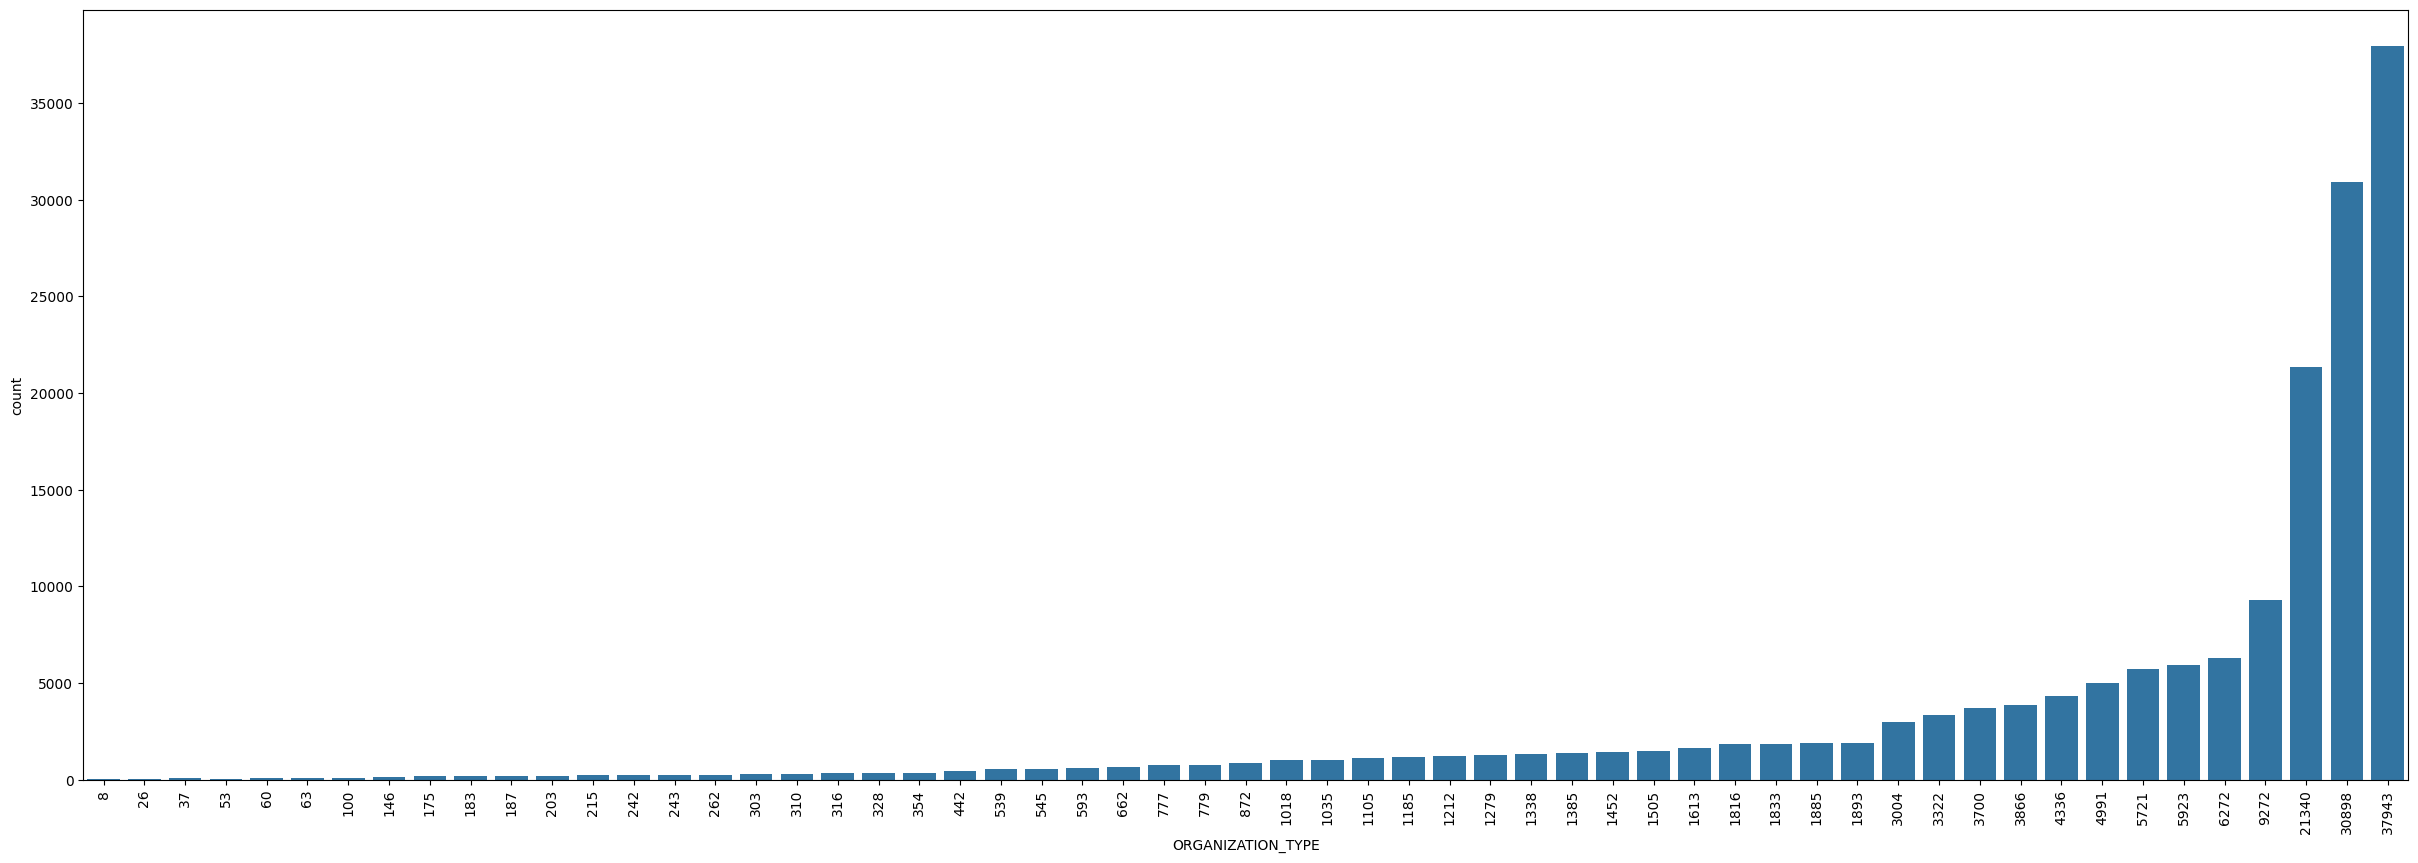

In [31]:
# ORGANIZATION_TYPEの分布
plt.figure(figsize=(30, 10))
sns.countplot(data=train, x="ORGANIZATION_TYPE")
plt.tick_params(axis="x", rotation=90)
plt.show()

ORGANIZATION_TYPEを数値型に変換します。今回は、変数のデータ数で数値化します。例えば、「Police」のデータ数が1279、「Bank」のデータ数が1385である場合には、「Police」を1279に、「Bank」を1385に変換します。このようにデータ数に置き換える手法をCount Encodingと呼びます。

In [27]:
# ORGANIZATION_TYPEの数値化（Count Encoding）
organization_ce = train["ORGANIZATION_TYPE"].value_counts()
train["ORGANIZATION_TYPE"] = train["ORGANIZATION_TYPE"].map(organization_ce)
test["ORGANIZATION_TYPE"] = test["ORGANIZATION_TYPE"].map(organization_ce)

train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_MEAN,OCCUPATION_TYPE_MISSING
0,0,0,0,F,N,N,0,112500.0,755190.0,36328.5,...,0.0,0.0,0.0,-292.0,NaN,NaN,NaN,NaN,0.372591,0
1,1,0,0,F,N,Y,0,225000.0,585000.0,16893.0,...,0.0,0.0,0.0,-617.0,0.0,0.0,0.0,1.0,0.501366,1
2,2,0,0,F,N,Y,0,54000.0,334152.0,18256.5,...,0.0,4.0,0.0,-542.0,NaN,NaN,NaN,NaN,0.569503,0
3,3,0,0,F,N,Y,0,67500.0,152820.0,8901.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.436379,1
4,4,1,0,M,N,N,0,157500.0,271066.5,21546.0,...,0.0,0.0,0.0,-1243.0,0.0,0.0,0.0,4.0,0.404630,0


###モデル

In [38]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss


In [51]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# 特徴量とターゲットの分割
X = train[['EXT_SOURCE_MEAN', 'OCCUPATION_TYPE_MISSING', 'AMT_INCOME_TOTAL', 'NAME_CONTRACT_TYPE', 'ORGANIZATION_TYPE']]
y = train['TARGET']


# 学習データと検証データの分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# LightGBMのデータセット作成
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

# LightGBMのパラメータ
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'seed': 42,
    'verbose': -1
}

# モデルの学習
num_round = 100
model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_eval],
    valid_names=['valid'],
)

# 手動での早期終了の代替
best_iter = model.best_iteration
model = lgb.train(params, lgb_train, valid_sets=[lgb_eval])

# 検証データでの評価
y_pred = model.predict(X_valid)
print("Validation Log Loss:", log_loss(y_valid, y_pred))


Validation Log Loss: 0.25970806945074637


In [56]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# XGBClassifierのインスタンス化
xgb = XGBClassifier(random_state=0)

# モデルの学習
xgb.fit(X_train, y_train)

# 予測（確率出力）
xgb_train_pred = xgb.predict_proba(X_train)[:, 1]
xgb_valid_pred = xgb.predict_proba(X_valid)[:, 1]

# AUCによる評価
print(f"Train Score: {roc_auc_score(y_train, xgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, xgb_valid_pred)}")


Train Score: 0.7789004882772621
Valid Score: 0.6936254698547033


In [53]:
# 例:
X_test = test[['EXT_SOURCE_MEAN', 'OCCUPATION_TYPE_MISSING', 'AMT_INCOME_TOTAL', 'NAME_CONTRACT_TYPE', 'ORGANIZATION_TYPE']]

# テストデータに対する予測
pred = model.predict(X_test)

# 予測結果を提出用DataFrameに格納
sample_sub['TARGET'] = pred

# 提出用のcsvファイルを作成
sample_sub.to_csv('submission.csv', index=False)
print("submission.csv が作成されました")

submission.csv が作成されました


In [57]:
compe

NameError: name 'compe' is not defined